# Burn Area Index <img align="right" src="image/gistda.png" width="200" height="200">

In this case study, we will analyze a wildfire event that occurred in Phu Kradueng National Park on 17th February 2020. 

Our objective is to compare the conditions before and after the wildfire incident.
Through this study, we aim to gain insights into the scale of the wildfire and its consequences, which can aid in environmental monitoring, land management, and the development of strategies to mitigate the impact of future wildfire events in the region.

<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.org/github/DreamPTK/rice-detection/blob/main/Tutorial/Burn_area.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

## Load Package

In [1]:
%matplotlib inline

from pystac_client import Client
from odc.stac import configure_rio, stac_load
from dask.distributed import Client as DaskClient
import matplotlib.pyplot as plt
from dream_river.indices import cal_index
from dream_river.plotimg import rgb

client = DaskClient()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34059/status,
Dashboard: http://127.0.0.1:34059/status,Workers: 4
Total threads: 8,Total memory: 39.15 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34573,Workers: 4
Dashboard: http://127.0.0.1:34059/status,Total threads: 8
Started: Just now,Total memory: 39.15 GiB
Comm: tcp://127.0.0.1:46365,Total threads: 2
Dashboard: http://127.0.0.1:40129/status,Memory: 9.79 GiB
Nanny: tcp://127.0.0.1:46341,


## Set Parameter

In [2]:
# Compute the bounding box for the study area
study_area = (101.694, 16.850, 101.820, 16.938)

#Set collection configuration
collections = ["LANDSAT8_SR_C2L2"]
config = {
    "LANDSAT8_SR_C2L2": {
        "assets": {
            "*": {
                "data_type": "uint16",
                "nodata": 0,
                "unit": "unitless",
            },
            "aerosol_qa": {
                "data_type": "uint8",
                "nodata": 0,
                "unit": "bit",
            },
            "pixel_qa": {
                "data_type": "uint16",
                "nodata": 0,
                "unit": "bit",
            },
            "radsat_qa": {
                "data_type": "uint16",
                "units": "bit",
                "nodata": 0,
            },
        },
    }
}

#### - Before

In [14]:
# before wildfire
query_previous = {
        "collections": collections,
        "bbox": study_area,
        "datetime": f"2020-02-01/2020-02-15"
        }

# connect to the GISTDA ODC STAC Catalog
catalog = Client.open(url="http://110.78.252.138/stac")
query = catalog.search(**query_previous)
items_previous = list(query.items())
print(f"Found: {len(items_previous):d} datasets")
for ds in items_previous:
    print(ds.to_dict()['properties']['title'])

Found: 3 datasets
LC08_L2SR_129048_20200203_20200823_02_T1
LC08_L2SR_129049_20200203_20200823_02_T1
LC08_L2SR_128049_20200212_20200823_02_T1


#### - After

In [15]:
# after wildfire
query_after = {
        "collections": collections,
        "bbox": study_area,
        "datetime": f"2020-02-15/2020-02-28"
        }

# connect to the GISTDA ODC STAC Catalog
catalog = Client.open(url="http://110.78.252.138/stac")
query = catalog.search(**query_after)
items_after = list(query.items())
print(f"Found: {len(items_after):d} datasets")
for ds in items_after:
    print(ds.to_dict()['properties']['title'])

Found: 3 datasets
LC08_L2SR_129048_20200219_20200822_02_T1
LC08_L2SR_129049_20200219_20200822_02_T1
LC08_L2SR_128049_20200228_20200822_02_T1


## Load dataset from datacube

#### Before

In [17]:
# Loading data using dc.load()
ds = stac_load(
    items_previous,
    bands=['blue','green','red',"nir"],
    stac_cfg=config,
    chunks={},
    groupby="solar_day",
    bbox=study_area,
)
ds

<xarray.Dataset> Size: 2MB
Dimensions:      (y: 332, x: 454, time: 2)
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 16B 2020-02-03T03:37:02 2020-02-12T03:...
Data variables:
    blue         (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    green        (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    red          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    nir          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>

#### After

In [18]:
# Loading data using dc.load()
ds_after = stac_load(
    items_after,
    bands=['blue','green','red',"nir"],
    stac_cfg=config,
    chunks={},
    groupby="solar_day",
    bbox=study_area,
)
ds_after

<xarray.Dataset> Size: 2MB
Dimensions:      (y: 332, x: 454, time: 2)
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 16B 2020-02-19T03:36:59 2020-02-28T03:...
Data variables:
    blue         (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    green        (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    red          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    nir          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>

## Explore the study area

#### Before

the image is on 3 February 2020.

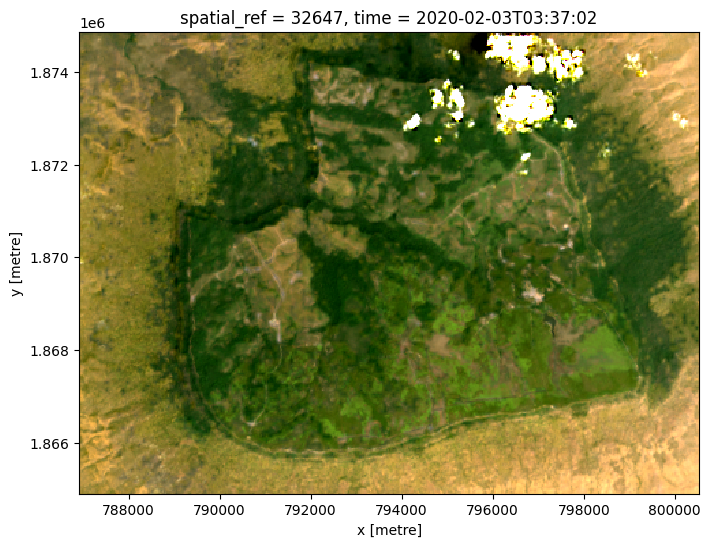

In [19]:
# Plot as an RGB image select first timestep 
rgb(ds, bands=['red','green', 'blue'], index=[0])

#### After

the image is on 19 February 2020. (after wildfire)

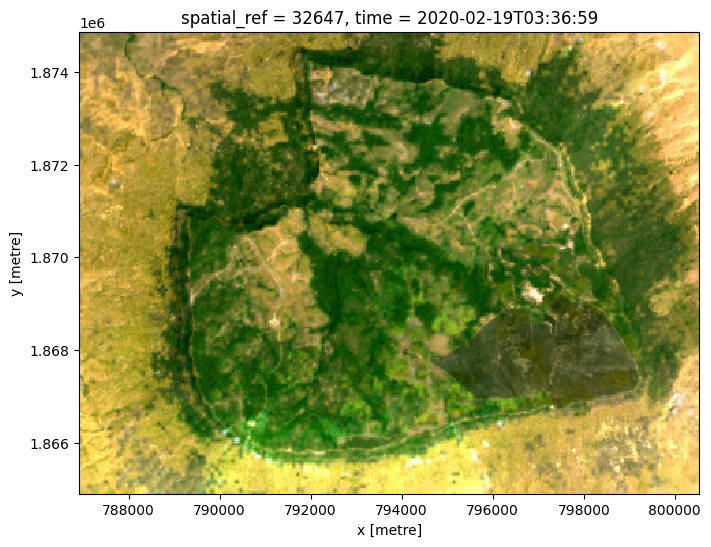

In [20]:
# Plot as an RGB image select first timestep 
rgb(ds_after, bands=['red','green', 'blue'], index=[0])

You can see the differance of two images.

## Calculate BAI Index

The Burn Area Index (BAI) uses the reflectance values in the red and NIR portion of the spectrum to identify the areas of the terrain affected by fire.

#### Before

In [28]:
# Calculate indices 
ds_index = cal_index(ds, 
                    index=['BAI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_index

<xarray.Dataset> Size: 5MB
Dimensions:      (y: 332, x: 454, time: 2)
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 16B 2020-02-03T03:37:02 2020-02-12T03:...
Data variables:
    blue         (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    green        (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    red          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    nir          (time, y, x) uint16 603kB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>
    BAI          (time, y, x) float64 2MB dask.array<chunksize=(1, 332, 454), meta=np.ndarray>

In [31]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_time = ds_index.isel(time = 0)

# explore data
ds_time

<xarray.Dataset> Size: 2MB
Dimensions:      (y: 332, x: 454)
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
    time         datetime64[ns] 8B 2020-02-03T03:37:02
Data variables:
    blue         (y, x) uint16 301kB dask.array<chunksize=(332, 454), meta=np.ndarray>
    green        (y, x) uint16 301kB dask.array<chunksize=(332, 454), meta=np.ndarray>
    red          (y, x) uint16 301kB dask.array<chunksize=(332, 454), meta=np.ndarray>
    nir          (y, x) uint16 301kB dask.array<chunksize=(332, 454), meta=np.ndarray>
    BAI          (y, x) float64 1MB dask.array<chunksize=(332, 454), meta=np.ndarray>

#### After

In [34]:
# Calculate indices 
ds_BAI = cal_index(ds_after, 
                    index=['BAI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_BAI.BAI.compute()

<xarray.DataArray 'BAI' (time: 2, y: 332, x: 454)> Size: 2MB
array([[[ 0.408955  ,  0.37724401,  0.42248507, ...,  0.31999355,
          0.3131426 ,  0.29485262],
        [ 0.41429997,  0.40874981,  0.43043572, ...,  0.30226171,
          0.29120975,  0.3105838 ],
        [ 0.42805008,  0.43891254,  0.4326065 , ...,  0.30744401,
          0.28905664,  0.31291316],
        ...,
        [ 0.37548263,  0.39107952,  0.40918874, ...,  0.3554982 ,
          0.36463164,  0.35868558],
        [ 0.42260083,  0.38861325,  0.39364559, ...,  0.34481425,
          0.3695135 ,  0.34890445],
        [ 0.41141259,  0.39107924,  0.39562238, ...,  0.34814724,
          0.37729891,  0.37830767]],

       [[73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176],
        [73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176],
        [73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176],
        ...,
        [73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176],
        [73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176],
        [73.52941176, 73.52941176, 73.52941176, ..., 73.52941176,
         73.52941176, 73.52941176]]])
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 16B 2020-02-19T03:36:59 2020-02-28T03:...

In [35]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_post = ds_BAI.isel(time = 0)

# explore data
ds_post.BAI.compute()

<xarray.DataArray 'BAI' (y: 332, x: 454)> Size: 1MB
array([[0.408955  , 0.37724401, 0.42248507, ..., 0.31999355, 0.3131426 ,
        0.29485262],
       [0.41429997, 0.40874981, 0.43043572, ..., 0.30226171, 0.29120975,
        0.3105838 ],
       [0.42805008, 0.43891254, 0.4326065 , ..., 0.30744401, 0.28905664,
        0.31291316],
       ...,
       [0.37548263, 0.39107952, 0.40918874, ..., 0.3554982 , 0.36463164,
        0.35868558],
       [0.42260083, 0.38861325, 0.39364559, ..., 0.34481425, 0.3695135 ,
        0.34890445],
       [0.41141259, 0.39107924, 0.39562238, ..., 0.34814724, 0.37729891,
        0.37830767]])
Coordinates:
  * y            (y) float64 3kB 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 4kB 7.869e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 4B 32647
    time         datetime64[ns] 8B 2020-02-19T03:36:59

## Plot images result

The results of our analysis clearly show the stark difference between the two satellite images captured before and after the wildfire event.

#### Before

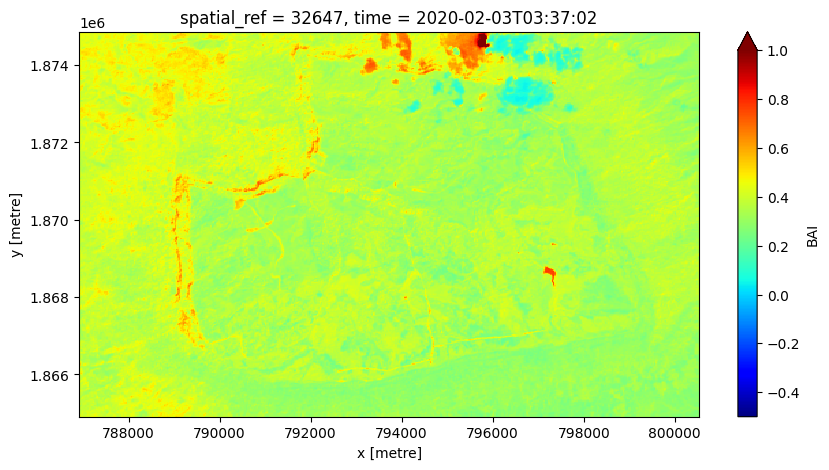

In [44]:
# Plot the results 
ds_time.BAI.plot(vmin=-0.5, vmax=1, cmap='jet', figsize=(10, 5))

#### After

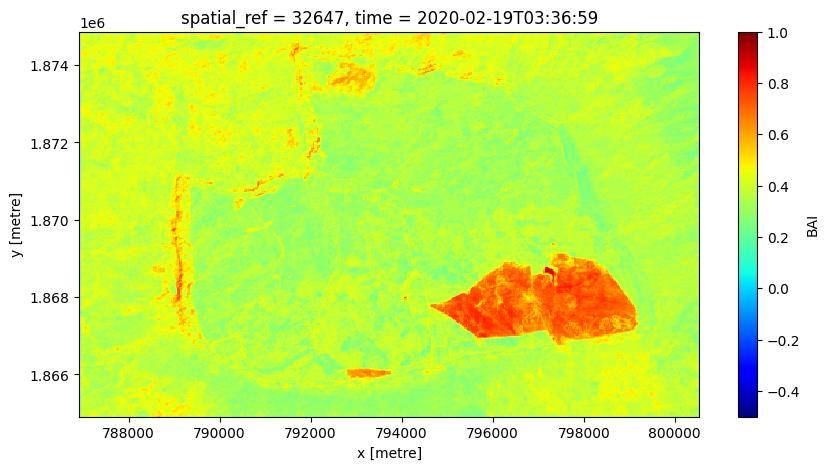

In [45]:
# Plot the results
ds_post.BAI.plot(vmin=-0.5, vmax=1, cmap='jet', figsize=(10, 5))